In [1]:
#import packages
#read data
#divide into numerical and categorical

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path_visa=r'C:\Users\LG\Documents\DataFiles\Visadataset.csv'
visa_df=pd.read_csv(path_visa)
visa_df

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [100]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
visa_df[['continent', 'case_status']]

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


In [7]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [9]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [16]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

- How many memebers are ceritified from Asia
- How many members are denied from Asia



In [19]:
cond1=visa_df['continent']== 'Asia'
cond2=visa_df['case_status']=='Certified'
cond=cond1&cond2
visa_df[cond]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [21]:
len(visa_df[cond])

11012

In [23]:
cond1=visa_df['continent']== 'Asia'
cond2=visa_df['case_status']=='Certified'
cond3=visa_df['case_status']=='Denied'

certi_con=cond1&cond2
deni_con=cond1&cond3

len(visa_df[certi_con]), len(visa_df[deni_con])


(11012, 5849)

In [25]:
labels=visa_df['continent'].unique()
labels

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [27]:
labels=visa_df['continent'].unique()

certified,denied=[],[]
for i in labels:
    cond1=visa_df['continent']== i
    cond2=visa_df['case_status']=='Certified'
    cond3=visa_df['case_status']=='Denied'
    certi_con=cond1&cond2
    deni_con=cond1&cond3
    
    certified.append(len(visa_df[certi_con]))
    denied.append(len(visa_df[deni_con]))
certified

[11012, 397, 2037, 2957, 493, 122]

In [29]:
denied

[5849, 154, 1255, 775, 359, 70]

In [31]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [33]:
pd.DataFrame(zip(certified,denied),index=labels,columns=['Certified', 'Denied'])

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Crosstab**

In [36]:
id_col=visa_df['continent']
col=visa_df['case_status']
r1=pd.crosstab(id_col,col)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

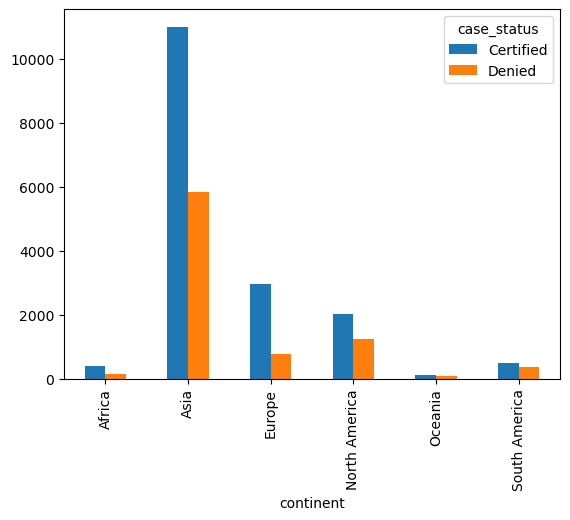

In [38]:
r1.plot(kind='bar')

<Axes: ylabel='Frequency'>

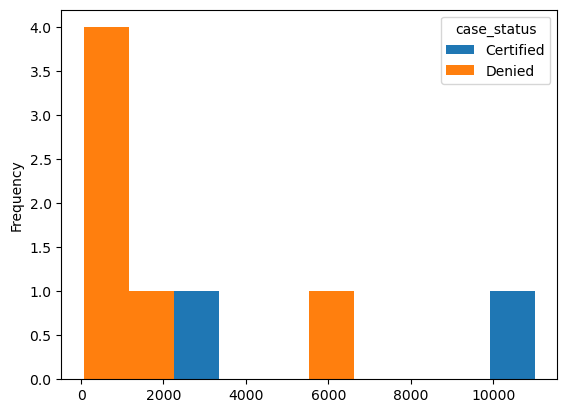

In [40]:
r1.plot(kind='hist')

<Axes: xlabel='continent', ylabel='count'>

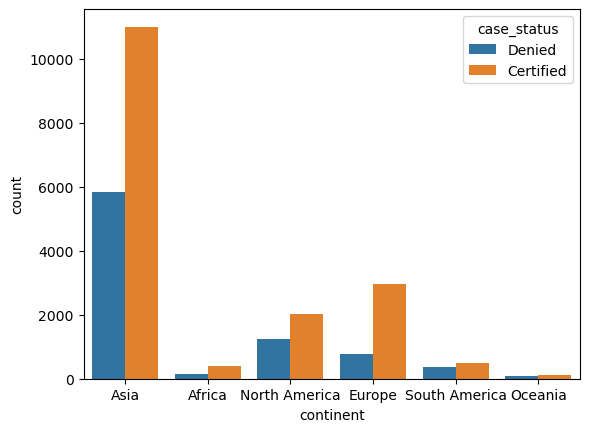

In [42]:
sns.countplot(data=visa_df,x='continent',hue='case_status')

<Axes: xlabel='continent', ylabel='count'>

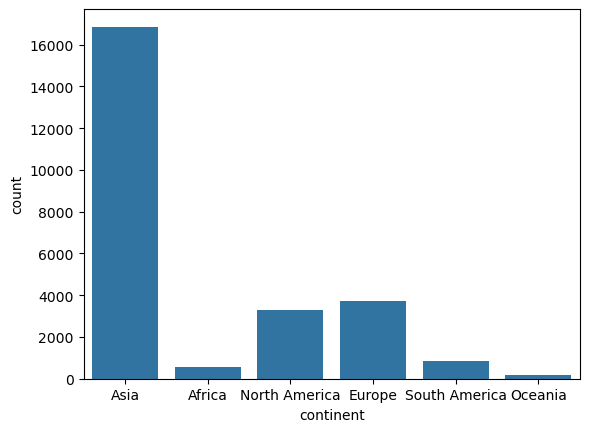

In [44]:
sns.countplot(data=visa_df,x='continent')

In [47]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [67]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']

idx= col1
columns=[col2,col3]

r2=pd.crosstab(idx,columns)
r2


education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

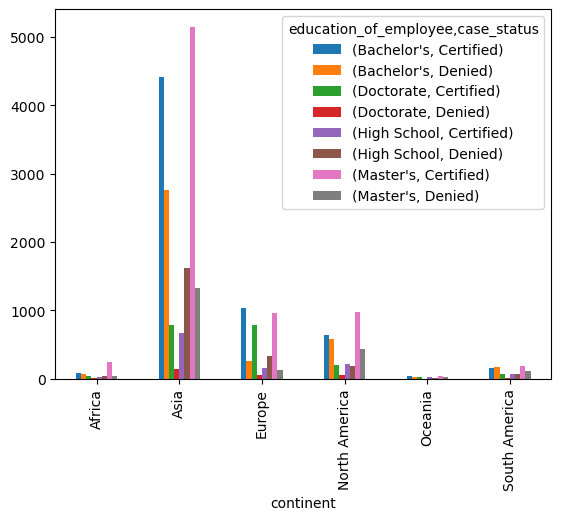

In [71]:
r2.plot(kind='bar')

In [73]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']

idx= col2
cols=[col1,col2]

r2=pd.crosstab(idx,columns=cols)
r2


continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
education_of_employee                                                        
Bachelor's                   143         0           0        0       7168   
Doctorate                      0        54           0        0          0   
High School                    0         0          66        0          0   
Master's                       0         0           0      288          0   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
education_of_employee                                                       
Bachelor's                    0           0        0       1299         0   
Doctorate                   923           0        0          0       846   
High School                   0        2290        0          0         0   
Master's                      0           0     6480          0         0   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
education_of_employee  ...                                               
Bachelor's             ...             0        0         66         0   
Doctorate              ...             0        0          0        22   
High School            ...           401        0          0         0   
Master's               ...             0     1408          0         0   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
education_of_employee                                                
Bachelor's                      0        0           333         0   
Doctorate                       0        0             0        89   
High School                    36        0             0         0   
Master's                        0       68             0         0   

continent                                   
education_of_employee High School Master's  
education_of_employee                       
Bachelor's                      0        0  
Doctorate                       0        0  
High School                   137        0  
Master's                        0      293  

[4 rows x 24 columns]

<Axes: xlabel='education_of_employee'>

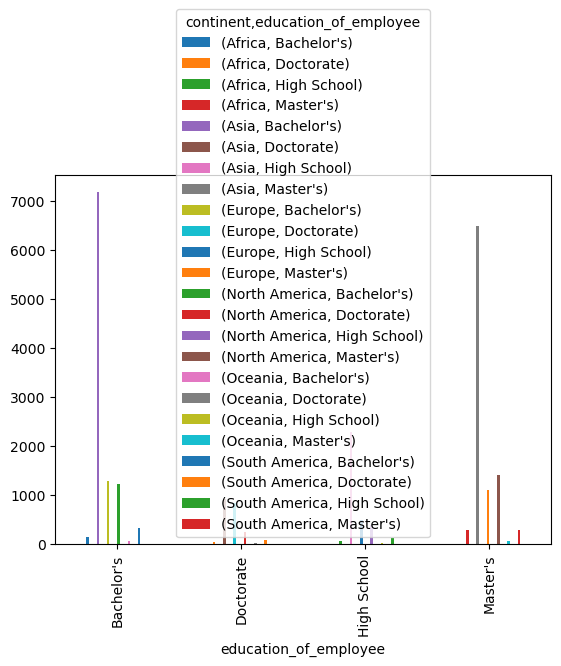

In [75]:
r2.plot(kind='bar')

**Scatter Plot**

- barchat - frequency table
- pie chart - relative frequency table
- histogram - frequency distribution plot
- box plot  - outlier analysis
- scatterplot - Relation between two numerical columns

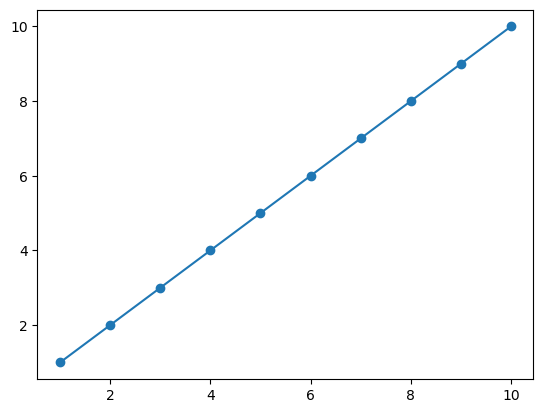

In [84]:
x=list(range(1,11))
y=list(range(1,11))
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

[16, 9, 4, 1, 0, 1, 4, 9, 16]


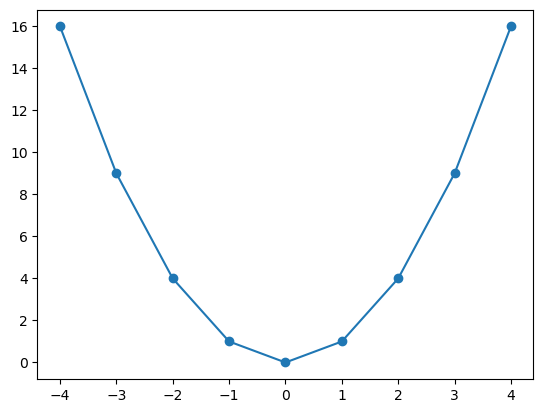

In [88]:
x=list(range(-4,5))
y=[i*i for i in x]
print(y)

plt.scatter(x,y)
plt.plot(x,y)
plt.show()


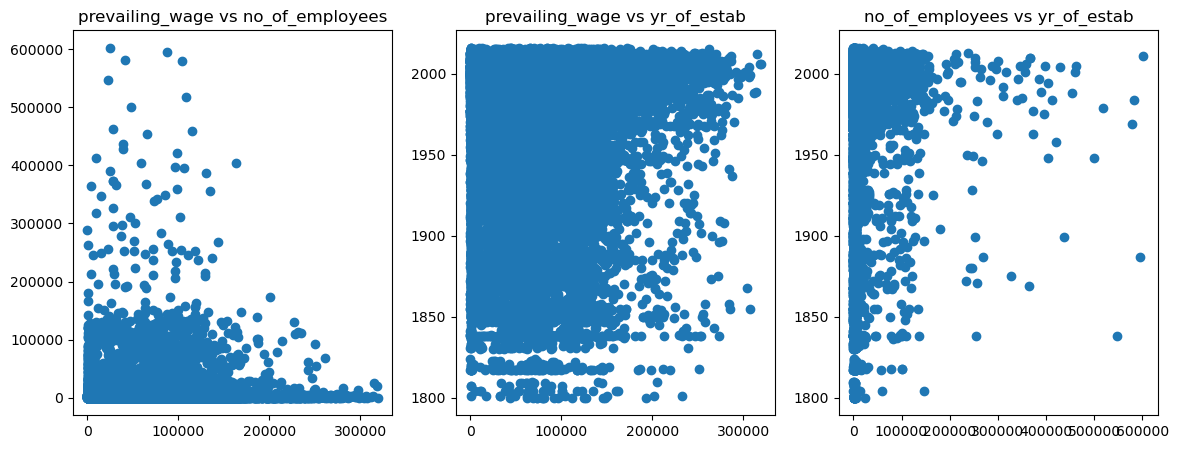

In [109]:
col1=visa_df['prevailing_wage']
col2=visa_df['no_of_employees']
col3=visa_df['yr_of_estab']
plt.figure(figsize=(14,5))

plt.subplot(1,3,1).scatter(col1,col2)
plt.title('prevailing_wage vs no_of_employees')

plt.subplot(1,3,2).scatter(col1,col3)
plt.title('prevailing_wage vs yr_of_estab')

plt.subplot(1,3,3).scatter(col2,col3)
plt.title('no_of_employees vs yr_of_estab')

plt.show()

**Correlation**

In [105]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heatmap**

<Axes: >

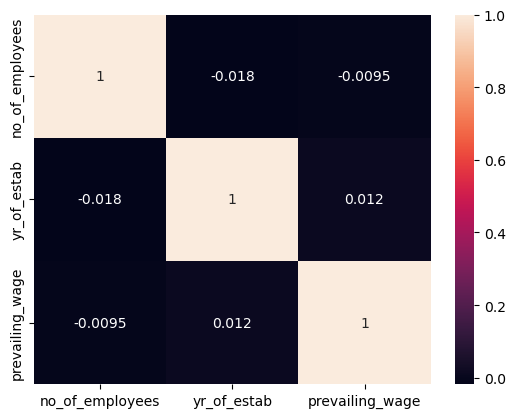

In [114]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [ ]:
# Step 1 wine quality dataset
# Step 2: apply the correlation: 12*12 = 144 values
# step 3: 

In [116]:
path_visa=r'C:\Users\LG\Documents\DataFiles\winequality_red.csv'
wine_df=pd.read_csv(path_visa)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [120]:
corr=wine_df.corr(numeric_only=True)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

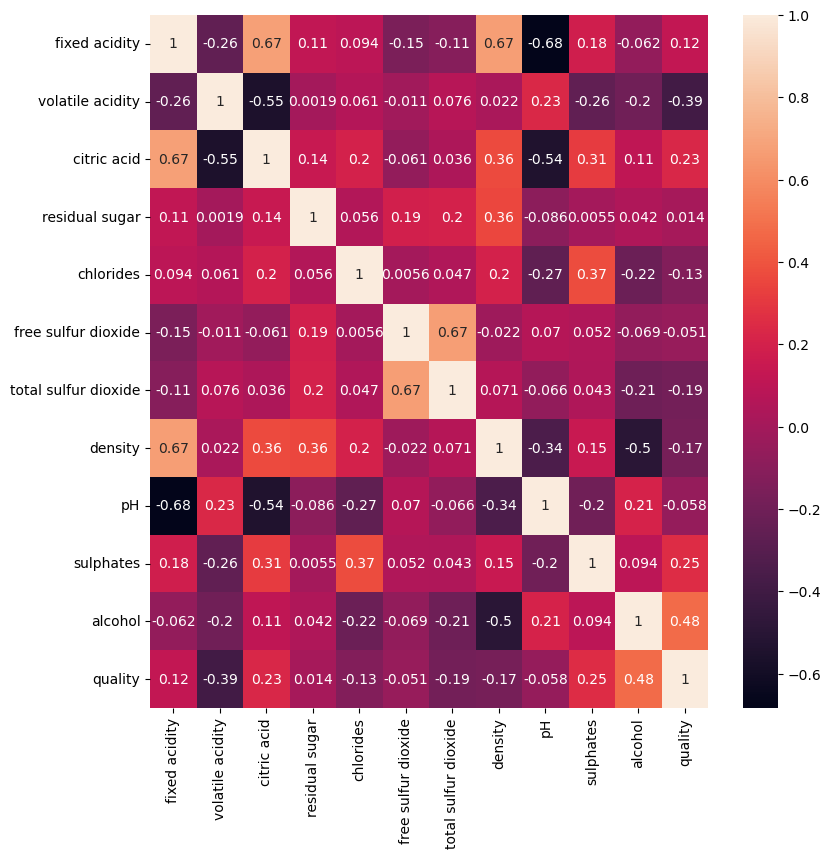

In [128]:
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

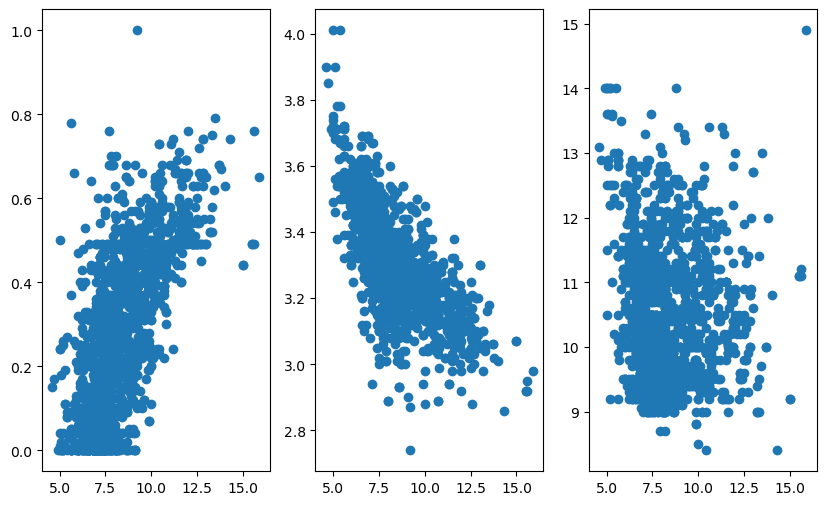

In [138]:
col1=wine_df['fixed acidity']
col2=wine_df['citric acid']
col3=wine_df['pH']
col4=wine_df['alcohol']
plt.figure(figsize=(10,6))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col1,col4)